# Install and Load Packages

In [1]:
install.packages("spdep")
install.packages("tidyverse")
install.packages("readxl")
install.packages("car")
install.packages("sf")
install.packages("stplan")
install.packages("terra")
install.packages("tmap")
install.packages("leaflet")
install.packages("tseries")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘classInt’, ‘Rcpp’, ‘wk’, ‘proxy’, ‘spData’, ‘sf’, ‘deldir’, ‘units’, ‘s2’, ‘e1071’, ‘sp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘conflicted’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Matrix’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘p

In [14]:
install.packages("rgdal")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
library(spdep)
library(tidyverse)
# library(readr)
library(rgdal)
library(readxl)
library(car)
library(sf)
# library(stplanr)
library(terra)
library(tmap)
library(leaflet)
library(tseries)

Loading required package: sp

Please note that rgdal will be retired during October 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html and https://github.com/r-spatial/evolution
rgdal: version: 1.6-7, (SVN revision 1203)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.3.2, released 2021/09/01
Path to GDAL shared files: /usr/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.2.1, January 1st, 2021, [PJ_VERSION: 721]
Path to PROJ shared files: /root/.local/share/proj:/usr/share/proj
PROJ CDN enabled: TRUE
Linking to sp version:2.0-0
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading sp or rgdal.


Attaching package: ‘rgdal’


The following object is masked from ‘package:terra’:

    project




# Load Dataset

In [5]:
# Import data variabel penyerta
dataset <- read_excel("dataset_skripsi_revisi.xlsx")

# Check missing data
sapply(dataset, function(x) sum(is.na(dataset)))
str(dataset)

# Filter variabel
data_x <- dataset[, -c(1,2,3,4)]
data_y <- dataset[, 4]

# Analisis Deskriptif
summary(data_x)
summary(data_y)

No        KodeKecamatan        NamaKecamatan 
                   0                    0                    0 
           PEND_LGSG           ntl_median           lst_median 
                   0                    0                    0 
          bui_median            co_median         pm2.5_median 
                   0                    0                    0 
    elevation_median aridity_index_median         rwi_weighted 
                   0                    0                    0 
 jlh_klg_listrik_pln         jlh_fas_pddk         jlh_fas_ksht 
                   0                    0                    0 
             jlh_imk  jlh_sentra_industri       jlh_sarana_eko 
                   0                    0                    0 
       jlh_tmpt_ibdh   kepadatan_penduduk 
                   0                    0

tibble [572 × 20] (S3: tbl_df/tbl/data.frame)
 $ No                  : num [1:572] 1 2 3 4 5 6 7 8 9 10 ...
 $ KodeKecamatan       : num [1:572] 3301010 3301020 3301030 3301040 3301050 ...
 $ NamaKecamatan       : chr [1:572] "Dayeuhluhur" "Wanareja" "Majenang" "Cimanggu" ...
 $ PEND_LGSG           : num [1:572] 23.9 16.1 19.8 20.6 25.5 ...
 $ ntl_median          : num [1:572] 2.06 2.06 1.97 2.55 2.75 ...
 $ lst_median          : num [1:572] 27.3 28.6 27.1 28.6 28.8 ...
 $ bui_median          : num [1:572] -1.09 -1.04 -1.04 -1.02 -1.07 ...
 $ co_median           : num [1:572] 0.0296 0.0307 0.0301 0.032 0.0293 ...
 $ pm2.5_median        : num [1:572] 40.4 35.1 35.7 33.1 30.3 ...
 $ elevation_median    : num [1:572] 347 113 214 155 112 52 15 6 3 14 ...
 $ aridity_index_median: num [1:572] 2.13 1.8 2.04 2.03 1.88 ...
 $ rwi_weighted        : num [1:572] -0.066 0.4655 0.4854 0.2715 0.0747 ...
 $ jlh_klg_listrik_pln : num [1:572] 20142 40280 50842 38141 28380 ...
 $ jlh_fas_pddk        : nu

   ntl_median       lst_median      bui_median         co_median      
 Min.   : 1.373   Min.   :22.64   Min.   :-1.20879   Min.   :0.01706  
 1st Qu.: 2.216   1st Qu.:28.64   1st Qu.:-0.98658   1st Qu.:0.02682  
 Median : 2.639   Median :30.57   Median :-0.75872   Median :0.02866  
 Mean   : 3.128   Mean   :30.30   Mean   :-0.77524   Mean   :0.02882  
 3rd Qu.: 3.182   3rd Qu.:31.93   3rd Qu.:-0.62883   3rd Qu.:0.03111  
 Max.   :19.035   Max.   :37.88   Max.   : 0.03596   Max.   :0.03821  
  pm2.5_median   elevation_median aridity_index_median  rwi_weighted    
 Min.   :17.50   Min.   :   1.0   Min.   :0.8404       Min.   :-0.4047  
 1st Qu.:32.10   1st Qu.:  25.0   1st Qu.:1.2586       1st Qu.: 0.2410  
 Median :36.33   Median : 114.5   Median :1.4555       Median : 0.4299  
 Mean   :35.75   Mean   : 246.5   Mean   :1.5689       Mean   : 0.4561  
 3rd Qu.:40.20   3rd Qu.: 331.0   3rd Qu.:1.8331       3rd Qu.: 0.6453  
 Max.   :49.40   Max.   :1816.0   Max.   :2.7325       Max.   : 1

   PEND_LGSG     
 Min.   : 8.309  
 1st Qu.:20.531  
 Median :26.146  
 Mean   :27.604  
 3rd Qu.:32.614  
 Max.   :71.308  

# Moran's I *Test*

In [7]:
# moran.test
W <- read.gal("QC_MAT.gal", override.id=TRUE)
w <- nb2listw(W, glist=NULL, style="W", zero.policy=NULL)
# write.nb.gal(w$neighbours, "E:/GEOJSON/queen_cont.gal")
Y <- dataset$PEND_LGSG
result_moran <- moran.test(Y, w, randomisation=FALSE, zero.policy=TRUE, alternative="two.sided",
                           rank = FALSE, na.action=na.fail, spChk=NULL, adjust.n=TRUE)
result_moran


	Moran I test under normality

data:  Y  
weights: w    

Moran I statistic standard deviate = 7.084, p-value = 1.4e-12
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
     0.1804663118     -0.0017513135      0.0006616349 


# Monte Carlo Simulation Test

In [8]:
set.seed(123)
MC<- moran.mc(Y, w, nsim=599)

# View results (including p-value)
MC


	Monte-Carlo simulation of Moran I

data:  Y 
weights: w  
number of simulations + 1: 600 

statistic = 0.18047, observed rank = 600, p-value = 0.001667
alternative hypothesis: greater


# Local Moran's I

In [9]:
oid <- order(Y)
localMI <- localmoran(Y, w)
signifikansi_y <- rep(0,572)
localMI <- cbind(localMI, signifikansi_y)
localMI[,5] <- round(localMI[,5], 4)

for(i in 1:nrow(localMI)){
  if(localMI[i,5] <= 0.05){
    localMI[i,6] <- 1 # SIGNIFIKAN = 1
  } else{
    localMI[i,6] <- 0 # TIDAK SIGNIFIKAN = 0
  }
}

# Jumlah kecamatan yg signifikan
sum(localMI[,6] == 1)

# Jumlah kecamatan yg tidak signifikan
sum(localMI[,6] != 1)

View(localMI)

[1] 73

[1] 499

,Ii,E.Ii,Var.Ii,Z.Ii,Pr(z != E(Ii)),signifikansi_y
3301010,0.280990366,-2.082241e-04,0.0395538610,1.41390001,0.1574,0
3301020,0.177617195,-2.026232e-03,0.2297079016,0.37482053,0.7078,0
3301030,0.527093733,-9.364230e-04,0.0884063701,1.77589362,0.0758,0
3301050,-0.109945734,-7.527479e-04,0.0608169698,-0.44277425,0.6579,0
3301080,0.046779423,-6.566218e-05,0.0093396589,0.48472847,0.6279,0
3301090,-0.242096947,-2.642959e-03,0.3749602717,-0.39104744,0.6958,0
3301160,-0.046219741,-3.769431e-05,0.0042818064,-0.70576427,0.4803,0
3301170,0.449889238,-3.607587e-03,0.5113185159,0.63420329,0.5259,0
3301180,-0.023877659,-1.482259e-03,0.1196691475,-0.06473926,0.9484,0
3302020,-0.218495020,-1.583805e-03,0.1494279031,-0.56113345,0.5747,0


# Mapping Local Morans'I *P-values*

In [20]:
# Import shp
jateng.map <- st_read("join_new_data.shp",quiet=TRUE)

# MAPPING LOCAL MORAN'S I
listrik <- jateng.map$LISTRIK
listrik_localMI <- cbind(listrik, localMI)
MoranLocalMap = cbind(listrik_localMI, jateng.map)
MoranLocalMap = st_as_sf(MoranLocalMap, crs=st_crs(MoranLocalMap$geometry))
current.mode <- tmap_mode("view") #switch to interactive map

tm_shape(MoranLocalMap) +
  tm_fill(col = "Pr.z....E.Ii..",
          breaks=c(-Inf, 0.001, 0.01, 0.05, 0.1, Inf),
          palette = "-Blues",
          title = "local Moran's I p-values")+
  tm_borders(alpha = 0.5) +
  tm_layout(title="Mapping Local Moran's I P-Value")

tmap mode set to interactive viewing



# Mapping Local Morans'I values

In [21]:
tm_shape(MoranLocalMap) +
  tm_fill(col = "Ii",
          style = "pretty",
          palette = "RdBu",
          title = "local moran statistics (Ii)")+
  tm_borders(alpha = 0.5) +
  tm_layout(title="Mapping Local Moran's I Values")

Variable(s) "Ii" contains positive and negative values, so midpoint is set to 0. Set midpoint = NA to show the full spectrum of the color palette.



# LISA Cluster MAP 4 quadrant

In [22]:
quadrant <- vector(mode = "numeric", length = nrow(localMI))
DV <- jateng.map$LISTRIK - mean(jateng.map$LISTRIK)
C_mI <- localMI[,1] - mean(localMI[,1])
signif <- 0.05
quadrant[DV >0 & C_mI>0] <- 4
quadrant[DV <0 & C_mI<0] <- 1
quadrant[DV <0 & C_mI>0] <- 2
quadrant[DV >0 & C_mI<0] <- 3
quadrant[localMI[,5]>signif] <- 0

MoranLocalMap$quadrant <- quadrant
colors <- c("#ffffff", "#2c7bb6", "#abd9e9", "#fdae61", "#d7191c")
clusters <- c("insignificant", "low-low", "low-high", "high-low", "high-high")

# knitr::kable(head(MoranLocalMap, n=10))

tm_shape(MoranLocalMap) +
  tm_fill(col = "quadrant", style = "cat", palette = colors[c(sort(unique(quadrant)))+1],
          labels = clusters[c(sort(unique(quadrant)))+1], popup.vars = c("nmkec")) +
  tm_view() +
  tm_borders(alpha=0.5) +
  tm_layout(title="LISA Map Cluster")


# Jumlah kecamatan yg signifikan
sum(MoranLocalMap$quadrant == 1)
sum(MoranLocalMap$quadrant == 2)
sum(MoranLocalMap$quadrant == 3)
sum(MoranLocalMap$quadrant == 4)

# Jumlah kecamatan yg tidak signifikan
sum(MoranLocalMap$quadrant == 0)

[1] 12

[1] 29

[1] 13

[1] 19

[1] 499

# Moran's Plot

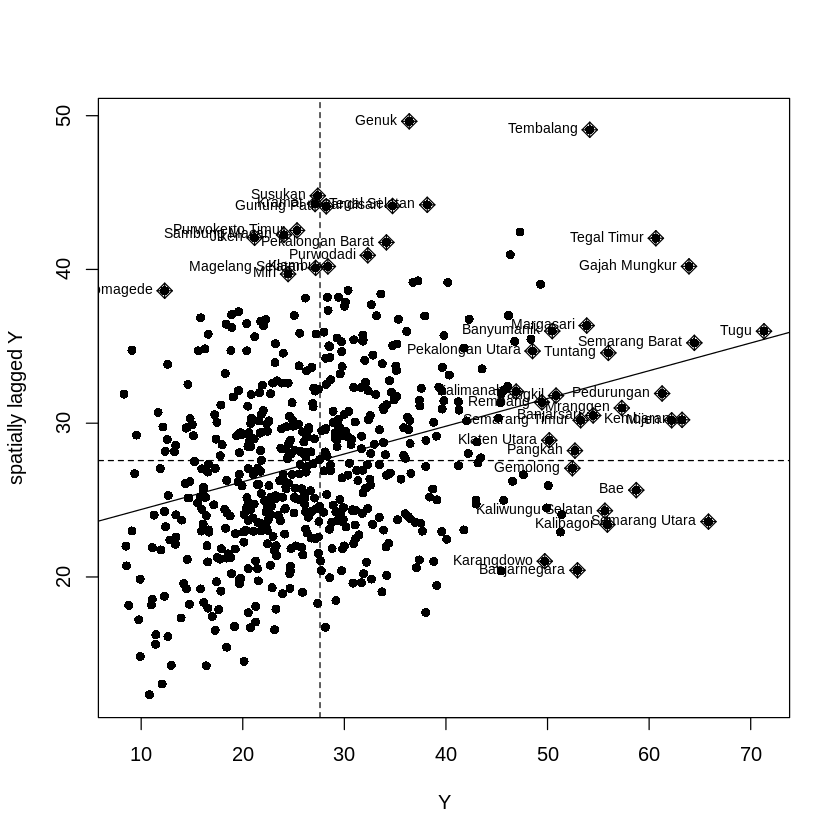

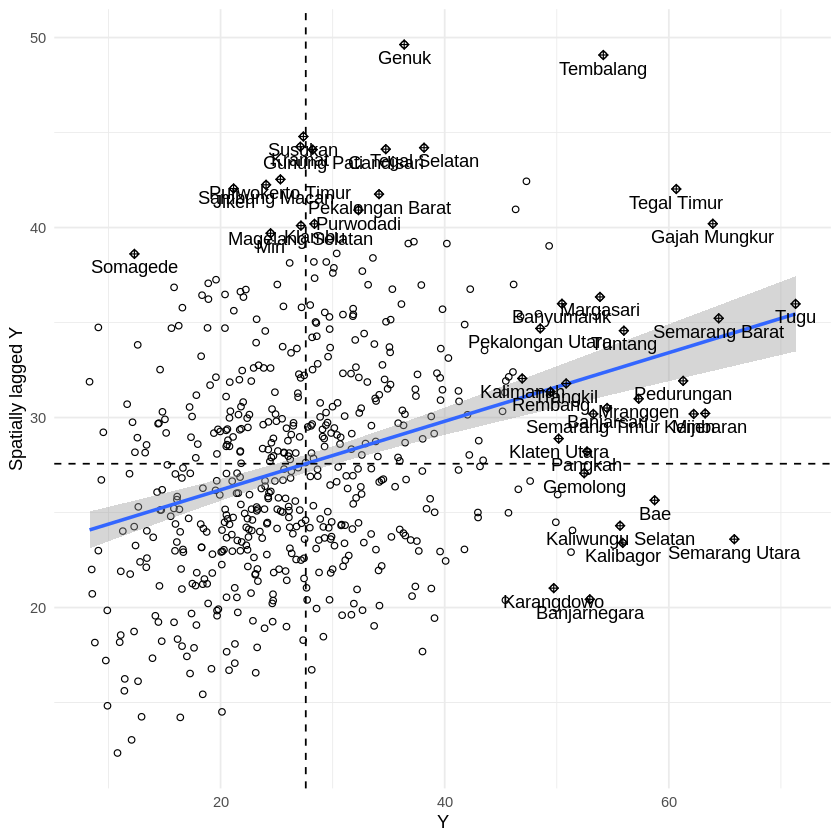

In [23]:
# moran.plot(Y, w)
y_scale <- scale(Y)
y_scale <- as.vector(y_scale)
mp <- moran.plot(Y, w, labels=as.character(dataset$NamaKecamatan), pch=16)
# moran.plot(as.vector(scale(Y)), w,
#            labels=as.character(dataset$NamaKecamatan), xlim=c(5, 75), ylim=c(10,60), pch=16)
if (require(ggplot2, quietly=TRUE)) {
  xname <- attr(mp, "xname")
  ggplot(mp, aes(x=x, y=wx)) + geom_point(shape=1) +
    geom_smooth(formula=y ~ x, method="lm") +
    geom_hline(yintercept=mean(mp$wx), lty=2) +
    geom_vline(xintercept=mean(mp$x), lty=2) + theme_minimal() +
    geom_point(data=mp[mp$is_inf,], aes(x=x, y=wx), shape=9) +
    geom_text(data=mp[mp$is_inf,], aes(x=x, y=wx, label=labels, vjust=1.5)) +
    xlab(xname) + ylab(paste0("Spatially lagged ", xname))
}

# Membuat cluster map LISA

In [24]:
remotes::install_github("Josiahparry/sfweight")
install.packages("ggplot2")


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpKEH26x/remotes11a51a14da7/JosiahParry-sfweight-dafcf17/DESCRIPTION’ ... OK
* preparing ‘sfweight’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘sfweight_0.0.0.9002.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“There was 1 warning in `stopifnot()`.
ℹ In argument: `nb = st_neighbors(geometry)`.
Caused by warning:
! `st_neighbors()` was deprecated in sfweight 0.0.0.9002.
ℹ Please use `st_contiguity()` instead.”


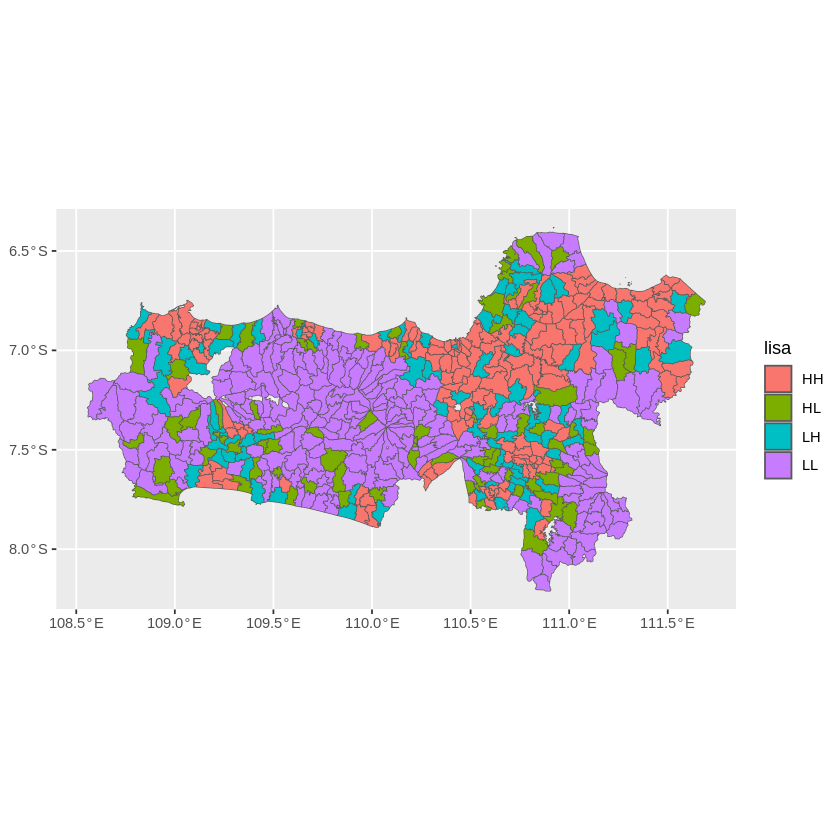

In [26]:
library(sfweight)
library(ggplot2)

queen <- poly2nb(as(jateng.map, "Spatial"), queen = T)

# calcualte the lisa groups
shape_lisa <- jateng.map %>%
  mutate(nb = st_neighbors(geometry),
         wts = st_weights(queen),
         lag_listrik = st_lag(LISTRIK, queen, wts),
         lisa = categorize_lisa(LISTRIK, lag_listrik))

# report results
ggplot(data = shape_lisa) +
  geom_sf(aes(fill = lisa))

# Konektivitas

Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”


OGR data source with driver: ESRI Shapefile 
Source: "/content/join_new_data.shp", layer: "join_new_data"
with 572 features
It has 32 fields
Integer64 fields read as strings:  No KodeKec 


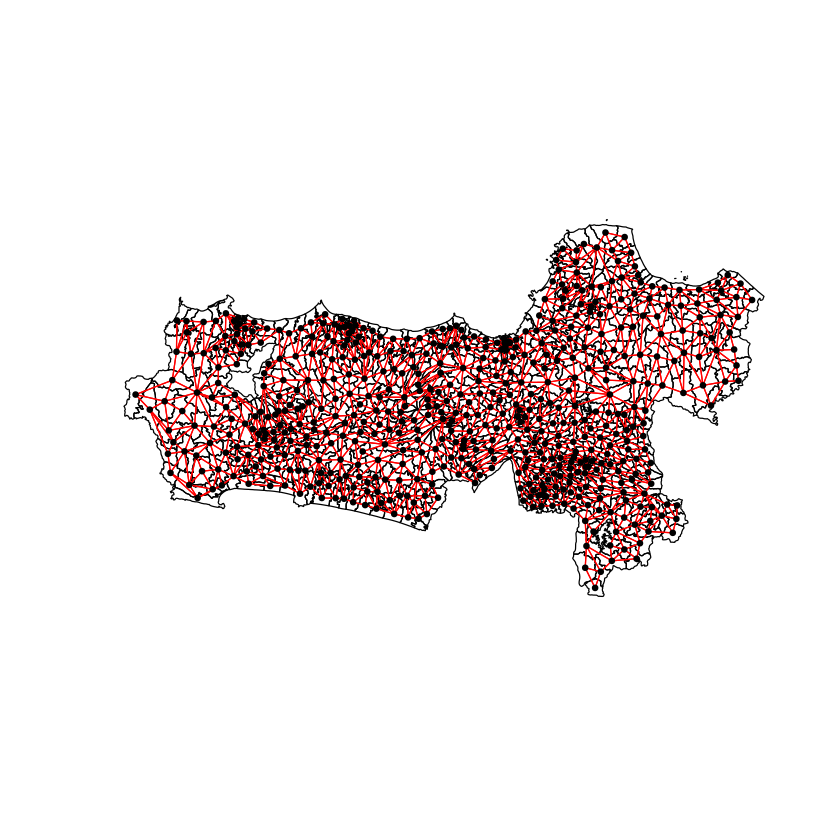

In [31]:
library(rgdal)
jatengmap <- readOGR("join_new_data.shp")
plot(jatengmap, border = 'black')
plot(queen, coordinates(jatengmap), pch = 19, cex = 0.6, add = TRUE, col = "red")